In [1]:
print('hello')

hello


In [2]:
!pip install python-dotenv

import os
from dotenv import load_dotenv
import requests
import pandas as pd

In [3]:
load_dotenv()
GRAPH_STUDIO_API_KEY = os.getenv("GRAPH_STUDIO_API_KEY")

In [4]:
url = "https://gateway.thegraph.com/api/subgraphs/id/5zvR82QoaXYFyDEKLZ9t6v9adgnptxYpKpSbxtgVENFV"

headers = {
    "Authorization": f"Bearer {GRAPH_STUDIO_API_KEY}"
}

# fetch top 1000 pools based on Volume (in USD) in Desc. order 
query = """
{
  pools(first: 1000, orderBy: volumeUSD, orderDirection: desc) {
    id
    token0 { symbol }
    token1 { symbol }
    feeTier
    volumeUSD
    totalValueLockedUSD
    token0Price
    token1Price
  }
}
"""

In [5]:

response = requests.post(url, json={"query": query}, headers=headers)
print(response.json())

{'data': {'pools': [{'feeTier': '500', 'id': '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640', 'token0': {'symbol': 'USDC'}, 'token0Price': '1526.2431691827826360670001082811', 'token1': {'symbol': 'WETH'}, 'token1Price': '0.0006552035876009481167399367903789188', 'totalValueLockedUSD': '360186965.1720029997641566762684918', 'volumeUSD': '551021851617.0159211928279361976709'}, {'feeTier': '500', 'id': '0x11b815efb8f581194ae79006d24e0d814b7697f6', 'token0': {'symbol': 'WETH'}, 'token0Price': '0.0006549050282870736548633161091072863', 'token1': {'symbol': 'USDT'}, 'token1Price': '1526.938955737649418723378190164595', 'totalValueLockedUSD': '64001841.1863670912739375501266033', 'volumeUSD': '119656639317.6134235802765331208318'}, {'feeTier': '100', 'id': '0x3416cf6c708da44db2624d63ea0aaef7113527c6', 'token0': {'symbol': 'USDC'}, 'token0Price': '0.9994342236788035732937508790816384', 'token1': {'symbol': 'USDT'}, 'token1Price': '1.000566096605251187508890370366471', 'totalValueLockedUSD': '443

In [6]:
response = requests.post(url, json={"query": query}, headers=headers)
data = response.json()

# Extract pool data
pools = data["data"]["pools"]

# Normalize nested token symbols into flat fields
clean_data = []
for pool in pools:
    clean_data.append({
        "id": pool["id"],
        "token0": pool["token0"]["symbol"],
        "token1": pool["token1"]["symbol"],
        "feeTier": pool["feeTier"],
        "volumeUSD": pool["volumeUSD"],
        "totalValueLockedUSD": pool["totalValueLockedUSD"],
        "token0Price": pool["token0Price"],
        "token1Price": pool["token1Price"]
    })

In [7]:
# Load into DataFrame
df = pd.DataFrame(clean_data)

# Convert numeric columns
numeric_fields = ["volumeUSD", "totalValueLockedUSD", "token0Price", "token1Price", "feeTier"]
df[numeric_fields] = df[numeric_fields].astype(float)

# Optional: sort by volume
df = df.sort_values(by="volumeUSD", ascending=False)

# Show the result
df.head(5)

,id,token0,token1,feeTier,volumeUSD,totalValueLockedUSD,token0Price,token1Price
0,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC,WETH,500.0,5.510219e+11,3.601870e+08,1526.243169,0.000655
1,0x11b815efb8f581194ae79006d24e0d814b7697f6,WETH,USDT,500.0,1.196566e+11,6.400184e+07,0.000655,1526.938956
2,0x3416cf6c708da44db2624d63ea0aaef7113527c6,USDC,USDT,100.0,9.804018e+10,4.432093e+07,0.999434,1.000566
3,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,WBTC,WETH,500.0,8.682803e+10,7.995926e+07,0.019123,52.293855
4,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,USDC,WETH,3000.0,8.312759e+10,2.517988e+08,1522.704067,0.000657


In [8]:
df.shape

(1000, 8)

In [9]:
import pandas as pd

# Combine token0 and token1 into a single Series
all_tokens = pd.concat([df['token0'], df['token1']])

# Count appearances of each token
token_counts = all_tokens.value_counts()

# Show top tokens
print(token_counts.head(10))

WETH    727
USDC    160
USDT     74
WBTC     39
DAI      22
FEI       9
UST       8
UNI       8
FUN       6
FRAX      6
Name: count, dtype: int64


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_20385/686751981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=token_counts.head(top_n).values, y=token_counts.head(top_n).index, palette="viridis")


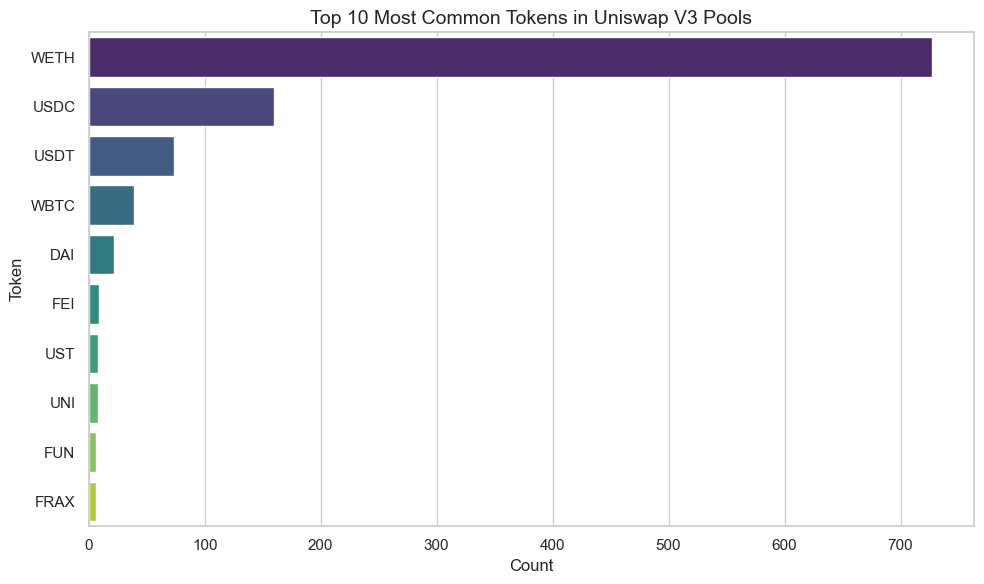

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set style
sns.set(style="whitegrid")

# Plot top 10 tokens
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x=token_counts.head(top_n).values, y=token_counts.head(top_n).index, palette="viridis")

plt.title(f"Top {top_n} Most Common Tokens in Uniswap V3 Pools", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Token")
plt.tight_layout()
plt.show()

In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   object 
 1   token0               1000 non-null   object 
 2   token1               1000 non-null   object 
 3   feeTier              1000 non-null   float64
 4   volumeUSD            1000 non-null   float64
 5   totalValueLockedUSD  1000 non-null   float64
 6   token0Price          1000 non-null   float64
 7   token1Price          1000 non-null   float64
dtypes: float64(5), object(3)
memory usage: 62.6+ KB
None
           feeTier     volumeUSD  totalValueLockedUSD   token0Price  \
count   1000.00000  1.000000e+03         1.000000e+03  1.000000e+03   
mean    5587.60000  1.595939e+09         2.873297e+06  3.437648e+49   
std     3929.17608  1.872215e+10         1.869719e+07  1.076029e+51   
min      100.00000  2.684181e+07        -2.252680e+06

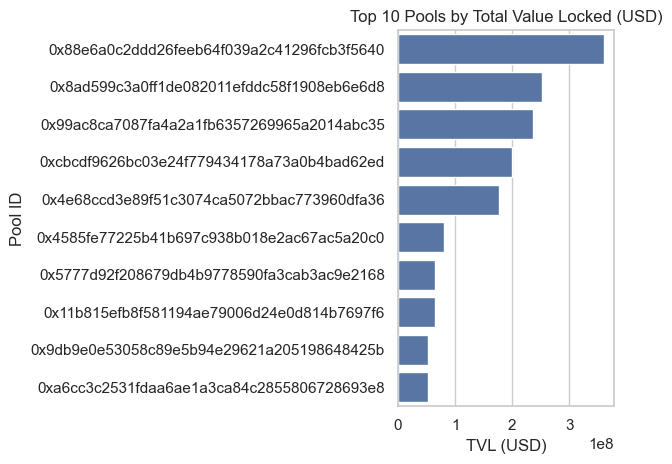

In [12]:
top_liquidity = df.sort_values("totalValueLockedUSD", ascending=False).head(10)
sns.barplot(x="totalValueLockedUSD", y="id", data=top_liquidity)
plt.title("Top 10 Pools by Total Value Locked (USD)")
plt.xlabel("TVL (USD)")
plt.ylabel("Pool ID")
plt.tight_layout()
plt.show()

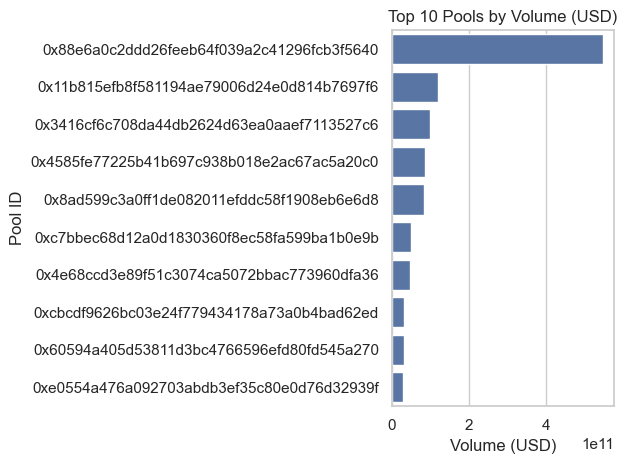

In [13]:
top_volume = df.sort_values("volumeUSD", ascending=False).head(10)
sns.barplot(x="volumeUSD", y="id", data=top_volume)
plt.title("Top 10 Pools by Volume (USD)")
plt.xlabel("Volume (USD)")
plt.ylabel("Pool ID")
plt.tight_layout()
plt.show()

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_20385/117303876.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="feeTier", data=df, palette="pastel")


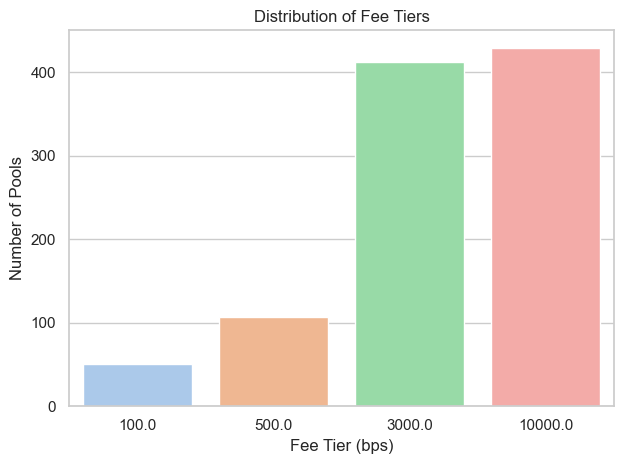

In [14]:
sns.countplot(x="feeTier", data=df, palette="pastel")
plt.title("Distribution of Fee Tiers")
plt.xlabel("Fee Tier (bps)")
plt.ylabel("Number of Pools")
plt.tight_layout()
plt.show()

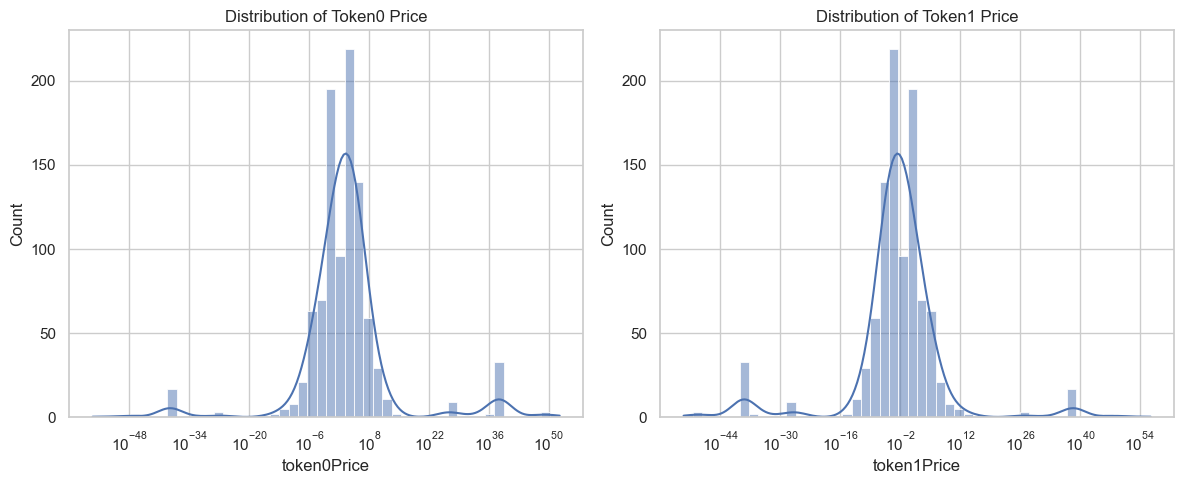

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["token0Price"], bins=50, kde=True, log_scale=True)
plt.title("Distribution of Token0 Price")

plt.subplot(1, 2, 2)
sns.histplot(df["token1Price"], bins=50, kde=True, log_scale=True)
plt.title("Distribution of Token1 Price")

plt.tight_layout()
plt.show()

In [16]:
# finding pools with high-volume BUT low-fees
df_filtered = df[(df["feeTier"] <= 500) & (df["volumeUSD"] > 1e9)]
df_filtered.sort_values("volumeUSD", ascending=False).head()

,id,token0,token1,feeTier,volumeUSD,totalValueLockedUSD,token0Price,token1Price
0,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC,WETH,500.0,5.510219e+11,3.601870e+08,1526.243169,0.000655
1,0x11b815efb8f581194ae79006d24e0d814b7697f6,WETH,USDT,500.0,1.196566e+11,6.400184e+07,0.000655,1526.938956
2,0x3416cf6c708da44db2624d63ea0aaef7113527c6,USDC,USDT,100.0,9.804018e+10,4.432093e+07,0.999434,1.000566
3,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,WBTC,WETH,500.0,8.682803e+10,7.995926e+07,0.019123,52.293855
5,0xc7bbec68d12a0d1830360f8ec58fa599ba1b0e9b,WETH,USDT,100.0,4.949321e+10,6.591092e+06,0.000655,1527.749205


In [17]:
query = """
{
  swaps(first: 1000, orderBy: amountUSD, orderDirection: desc) {
    amountUSD
    sender
    recipient
    token0 {
      symbol
    }
    token1 {
      symbol
    }
    timestamp
    pool {
      id
    }
  }
}
"""

In [18]:
response = requests.post(url, json={"query": query}, headers=headers)

# Check if response is OK
if response.status_code != 200:
    print(response.text)
else:
    data = response.json()
    swaps_data = data['data']['swaps'] 

In [19]:
import pandas as pd

df_swaps = pd.DataFrame(swaps_data)

# Convert numeric fields
df_swaps["amountUSD"] = df_swaps["amountUSD"].astype(float)

# Optional: Convert timestamp to datetime
df_swaps["timestamp"] = pd.to_datetime(df_swaps["timestamp"], unit="s")

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_20385/1619908237.py:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_swaps["timestamp"] = pd.to_datetime(df_swaps["timestamp"], unit="s")


In [20]:
df_swaps.head()

,amountUSD,pool,recipient,sender,timestamp,token0,token1
0,8.956745e+07,{'id': '0x6c6bc977e13df9b0de53b251522280bb7238...,0xd8c07491caa1edf960db3ceff387426d53942ea0,0xd8c07491caa1edf960db3ceff387426d53942ea0,2023-03-11 23:33:47,{'symbol': 'DAI'},{'symbol': 'USDC'}
1,6.253341e+07,{'id': '0x5777d92f208679db4b9778590fa3cab3ac9e...,0x9dd864d39fbfdf7648402746263e451cd4f36af0,0x9dd864d39fbfdf7648402746263e451cd4f36af0,2023-03-11 23:33:59,{'symbol': 'DAI'},{'symbol': 'USDC'}
2,5.399468e+07,{'id': '0x5777d92f208679db4b9778590fa3cab3ac9e...,0xdef171fe48cf0115b1d80b88dc8eab59176fee57,0xe592427a0aece92de3edee1f18e0157c05861564,2022-03-08 09:43:25,{'symbol': 'DAI'},{'symbol': 'USDC'}
3,5.375413e+07,{'id': '0x5777d92f208679db4b9778590fa3cab3ac9e...,0x00000000000747d525e898424e8774f7eb317d00,0x00000000000747d525e898424e8774f7eb317d00,2023-03-11 23:34:11,{'symbol': 'DAI'},{'symbol': 'USDC'}
4,4.799517e+07,{'id': '0x3416cf6c708da44db2624d63ea0aaef71135...,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,2022-01-22 11:28:22,{'symbol': 'USDC'},{'symbol': 'USDT'}


In [21]:
# Filter large swaps (> $1M)
whales = df_swaps[df_swaps["amountUSD"] > 1_000_000]

# Top whale wallets
top_whales = whales["sender"].value_counts().head(10)
print(top_whales)

sender
0xe592427a0aece92de3edee1f18e0157c05861564    215
0x05656db19ec9ff8dfb437475b3d76ca9a29e968f     74
0x220bda5c8994804ac96ebe4df184d25e5c2196d4     59
0xa69babef1ca67a37ffaf7a485dfff3382056e78c     56
0x00000000032962b51589768828ad878876299e14     52
0xeae695ba71f0f8206c7eaf26bd66ae1b8423950c     35
0xe37e799d5077682fa0a244d46e5649f71457bd09     31
0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45     30
0x36c219ff7ab5fb88c3d77e778da20dc9629ad752     30
0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b     24
Name: count, dtype: int64


In [22]:
# Filter out known contracts/aggregators (example using Uniswap's router)
router_addresses = [
    "0xe592427a0aece92de3edee1f18e0157c05861564",  # Uniswap V3 Router
    "0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45",  # Uniswap Universal Router
]

# Whales excluding known routers
real_whales = whales[~whales["sender"].isin(router_addresses)]

# Top whale addresses (non-router)
top_real_whales = real_whales["sender"].value_counts().head(10)
print(top_real_whales)

sender
0x05656db19ec9ff8dfb437475b3d76ca9a29e968f    74
0x220bda5c8994804ac96ebe4df184d25e5c2196d4    59
0xa69babef1ca67a37ffaf7a485dfff3382056e78c    56
0x00000000032962b51589768828ad878876299e14    52
0xeae695ba71f0f8206c7eaf26bd66ae1b8423950c    35
0xe37e799d5077682fa0a244d46e5649f71457bd09    31
0x36c219ff7ab5fb88c3d77e778da20dc9629ad752    30
0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b    24
0xb03feb49877a85925f15b42388f22512976ed54d    22
0xf38be77ac9a0643ada22dec416eb3158598614bb    16
Name: count, dtype: int64


but we're seeing all-time swap count. I realised this only after i looked up Etherscan, checked the 1st person's transactions and this was what i found:

- eth balance is 0
- no mathching entries BUT -- 1 internal transaction & >10 token transfers found (is surely a bot/arbitrage wallet)
- last transaction was 225 days ago


Now, we need a filter for ACTIVE wallets


In [23]:
query = """
{
  swaps(first: 1000, orderBy: amountUSD, orderDirection: desc, where: { timestamp_gt: 1710700000 }) {
    sender
    amountUSD
    timestamp
  }
}
"""

In [24]:
# Convert timestamp to datetime
df_swaps["timestamp"] = pd.to_datetime(df_swaps["timestamp"], unit='s')

# Filter to last 30 days
recent_swaps = df_swaps[df_swaps["timestamp"] >= pd.Timestamp.now() - pd.Timedelta(days=30)]

# Now redo the sender value counts
active_whales = recent_swaps["sender"].value_counts()

In [25]:
# Step 1: Count swap activity by wallet address (sender)
active_whales = recent_swaps["sender"].value_counts().head(10)

# Step 2: Print the result nicely
print("Top Active Wallets (Past 30 Days):\n")
print(active_whales)

Top Active Wallets (Past 30 Days):

sender
0x3bfe65f217df9ad7358698580aeb47f692241c48    12
Name: count, dtype: int64


checked the 1st person's profile on Etherscan:
- has >10 internal transfers + >10 token transfers
- last transaction ~2 hrs ago

is definitely an active account, likely a smart contract/DeFi bot

update: checked "contract" tab on Etherscan for this person's wallet address:
- code found + "Note: We also found another 1 contract with exact matching byte codes"

Now, we're sure this is a DeFi bot/automated trading contracts

In [26]:
import os
from dotenv import load_dotenv
load_dotenv()

ETHERSCAN_API_KEY = os.getenv("ETHERSCAN_API_KEY")

In [27]:
from datetime import datetime, timedelta

In [ ]:
# Wallets to check
wallets = [
    "0x3bfe65f217df9ad7358698580aeb47f692241c48",
    "0x7f9b6bb65c8f9105f46ec3b18cb31845c85b6e72",
    # Add more...
]

# ETH balance threshold to consider a whale
WHLE_ETH_THRESHOLD = 100_000 # 100k

def is_contract(address):
    url = f"https://api.etherscan.io/api?module=contract&action=getsourcecode&address={address}&apikey={ETHERSCAN_API_KEY}"
    res = requests.get(url)
    data = res.json()
    return data["result"][0]["ABI"] != "Contract source code not verified"

def get_eth_balance(address):
    url = f"https://api.etherscan.io/api?module=account&action=balance&address={address}&apikey={ETHERSCAN_API_KEY}"
    res = requests.get(url)
    data = res.json()
    # Convert from Wei to ETH
    return int(data["result"]) / 1e18

# Analyze each wallet
for address in wallets:
    contract = is_contract(address)
    if contract:
        print(f"{address} is a contract. Skipping...")
        continue

    balance = get_eth_balance(address)
    status = "WHALE 🐳" if balance >= WHLE_ETH_THRESHOLD else "Not whale"
    print(f"{address} → {balance:.2f} ETH → {status}")


In [ ]:
# Wallets to analyze
wallets = [
    "0x3bfe65f217df9ad7358698580aeb47f692241c48",
    "0x7f9b6bb65c8f9105f46ec3b18cb31845c85b6e72",
    # Add more...
]

# ERC20 tokens to track
TOKENS = {
    "USDC": "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48",
    "WETH": "0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2",
    "WBTC": "0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599",
}

# USD Prices (mock, or fetch from API like Coingecko if needed)
PRICES = {
    "ETH": 3200,
    "USDC": 1,
    "WETH": 3200,
    "WBTC": 68000,
}

# Threshold
WHALE_THRESHOLD = 100_000  # $100k

def is_contract(address):
    url = f"https://api.etherscan.io/api?module=contract&action=getsourcecode&address={address}&apikey={ETHERSCAN_API_KEY}"
    res = requests.get(url).json()
    return res["result"][0]["ABI"] != "Contract source code not verified"

def get_eth_balance(address):
    url = f"https://api.etherscan.io/api?module=account&action=balance&address={address}&apikey={ETHERSCAN_API_KEY}"
    res = requests.get(url).json()
    return int(res["result"]) / 1e18

def get_token_balance(address, token_contract):
    url = f"https://api.etherscan.io/api?module=account&action=tokenbalance&contractaddress={token_contract}&address={address}&apikey={ETHERSCAN_API_KEY}"
    res = requests.get(url).json()
    return int(res["result"]) / 1e6 if token_contract == TOKENS["USDC"] else int(res["result"]) / 1e18

def get_last_tx_timestamp(address):
    url = f"https://api.etherscan.io/api?module=account&action=txlist&address={address}&sort=desc&apikey={ETHERSCAN_API_KEY}"
    res = requests.get(url).json()
    txs = res.get("result", [])
    if txs:
        ts = int(txs[0]["timeStamp"])
        return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    return "No transactions found"

# 🧠 Whale analysis
for address in wallets:
    print(f"\n📬 Analyzing {address}...")

    if is_contract(address):
        print("🚫 Contract detected. Skipping...")
        continue

    eth = get_eth_balance(address)
    last_active = get_last_tx_timestamp(address)
    print(f"⏰ Last Active: {last_active}")
    print(f"💰 ETH: {eth:.2f} ≈ ${eth * PRICES['ETH']:.2f}")

    total_value = eth * PRICES["ETH"]
    token_values = {}

    for name, contract in TOKENS.items():
        bal = get_token_balance(address, contract)
        usd_val = bal * PRICES[name]
        token_values[name] = usd_val
        total_value += usd_val
        print(f"   • {name}: {bal:.4f} ≈ ${usd_val:,.2f}")

    status = "🐳 WHALE" if total_value >= WHALE_THRESHOLD else "🤏 Not whale"
    print(f"🔎 Total USD Value: ${total_value:,.2f} → {status}")


📬 Analyzing 0x3bfe65f217df9ad7358698580aeb47f692241c48...


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_76669/265575732.py:47: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')


⏰ Last Active: 2024-11-26 08:30:11
💰 ETH: 0.00 ≈ $0.00
   • USDC: 0.0000 ≈ $0.00
   • WETH: 0.0000 ≈ $0.00
   • WBTC: 0.0000 ≈ $0.00
🔎 Total USD Value: $0.00 → 🤏 Not whale

📬 Analyzing 0x7f9b6bb65c8f9105f46ec3b18cb31845c85b6e72...
⏰ Last Active: 2025-02-04 15:42:35
💰 ETH: 0.00 ≈ $0.00
   • USDC: 0.0000 ≈ $0.00
   • WETH: 0.0000 ≈ $0.00
   • WBTC: 0.0000 ≈ $0.00
🔎 Total USD Value: $0.00 → 🤏 Not whale


In [ ]:
cutoff = datetime.utcnow() - timedelta(days=30)

active_wallets = (
    df_swaps[df_swaps["timestamp"] > cutoff]["sender"]
    .value_counts()
    .head(50)
    .index
    .tolist()
)

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_76669/3362889208.py:1: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  cutoff = datetime.utcnow() - timedelta(days=30)


In [ ]:
df

,id,token0,token1,feeTier,volumeUSD,totalValueLockedUSD,token0Price,token1Price
0,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC,WETH,500.0,5.508394e+11,3.522494e+08,1.589215e+03,6.292414e-04
1,0x11b815efb8f581194ae79006d24e0d814b7697f6,WETH,USDT,500.0,1.196319e+11,6.818215e+07,6.288739e-04,1.590144e+03
2,0x3416cf6c708da44db2624d63ea0aaef7113527c6,USDC,USDT,100.0,9.801828e+10,4.554062e+07,9.995204e-01,1.000480e+00
3,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,WBTC,WETH,500.0,8.681409e+10,8.709321e+07,1.948296e-02,5.132691e+01
4,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,USDC,WETH,3000.0,8.310018e+10,2.440269e+08,1.591734e+03,6.282455e-04
...,...,...,...,...,...,...,...,...
995,0x03e67a3a7775f80e49cc8fe004592c5bc8e2d273,OTACON,WETH,3000.0,2.706082e+07,3.527904e+04,3.402568e+38,2.938957e-39
996,0x64652315d86f5dfae30885fbd29d1da05b63add7,FTM,WETH,3000.0,2.696309e+07,6.517746e+04,3.397209e+03,2.943593e-04
997,0xc58e1141a17bf31de10a308a50a87052e309b3f2,NII,USDC,10000.0,2.688933e+07,1.595426e+05,3.402568e+29,2.938957e-30
998,0x5cec64b1a39d46f2cb08b97abf086d78bacc9b61,RSTK,WETH,10000.0,2.687353e+07,1.734120e+05,1.071646e+04,9.331441e-05


### querying the Uniswap V3 subgraph to get:

- The most recent swaps (trades) from the USDC/WETH 0.05% pool

- Only those swaps that happened in the last 7 days

- Up to 100 most recent swaps


Each swap gives you:

- timestamp (when it occurred)

- sender (who initiated the swap)

- amountUSD (value of the swap in USD)

- Token info (token0/token1), which you're not printing right now but are available in the response

In [ ]:
# import requests
# import time

# def get_recent_swaps(pool_address, min_timestamp, max_swaps=2000, api_key="a812d5ef87e2ed2cf3f6dbb88cf1fe2a", min_usd=1_00_000):
#     url = "https://gateway.thegraph.com/api/subgraphs/id/5zvR82QoaXYFyDEKLZ9t6v9adgnptxYpKpSbxtgVENFV"
#     headers = {
#         "Authorization": f"Bearer {api_key}"
#     }

#     query = """
#     {
#       swaps(
#         first: %d
#         orderBy: timestamp
#         orderDirection: desc
#         where: {
#           pool: "%s",
#           timestamp_gt: %d
#         }
#       ) {
#         id
#         sender
#         amountUSD
#         token0 {
#           symbol
#         }
#         token1 {
#           symbol
#         }
#         timestamp
#       }
#     }
#     """ % (max_swaps, pool_address.lower(), min_timestamp)

#     response = requests.post(url, json={"query": query}, headers=headers)

#     if response.status_code == 200:
#         try:
#             swaps = response.json()["data"]["swaps"]
#             # Filter swaps with amountUSD > min_usd
#             large_swaps = [swap for swap in swaps if float(swap["amountUSD"]) > min_usd]
#             return large_swaps
#         except KeyError:
#             print("❌ Error in GraphQL response structure:")
#             print(response.json())
#             return []
#     else:
#         print(f"⚠️ Error {response.status_code}: {response.text}")
#         return []


import requests
import time

def get_recent_swaps(pool_address, min_timestamp, max_swaps=2000, api_key="a812d5ef87e2ed2cf3f6dbb88cf1fe2a", min_usd=100_000):
    url = "https://gateway.thegraph.com/api/subgraphs/id/5zvR82QoaXYFyDEKLZ9t6v9adgnptxYpKpSbxtgVENFV"
    headers = {
        "Authorization": f"Bearer {api_key}"
    }

    query = """
    {
      swaps(
        first: %d
        orderBy: timestamp
        orderDirection: desc
        where: {
          pool: "%s",
          timestamp_gt: %d
        }
      ) {
        id
        sender
        amountUSD
        amount0
        amount1
        token0 {
          symbol
        }
        token1 {
          symbol
        }
        timestamp
      }
    }
    """ % (max_swaps, pool_address.lower(), min_timestamp)

    response = requests.post(url, json={"query": query}, headers=headers)

    if response.status_code == 200:
        try:
            swaps_raw = response.json()["data"]["swaps"]
            # Filter and annotate swaps
            large_swaps = []

            for swap in swaps_raw:
                usd_value = float(swap["amountUSD"])
                if usd_value > min_usd:
                    amount0 = float(swap["amount0"])
                    amount1 = float(swap["amount1"])
                    token0 = swap["token0"]["symbol"]
                    token1 = swap["token1"]["symbol"]

                    if amount0 < 0:
                        sold_token = token0
                        sold_amount = -amount0
                        bought_token = token1
                        bought_amount = amount1
                    else:
                        sold_token = token1
                        sold_amount = -amount1
                        bought_token = token0
                        bought_amount = amount0

                    swap_info = {
                        "timestamp": swap["timestamp"],
                        "sender": swap["sender"],
                        "amountUSD": usd_value,
                        "sold_token": sold_token,
                        "sold_amount": sold_amount,
                        "bought_token": bought_token,
                        "bought_amount": bought_amount
                    }

                    large_swaps.append(swap_info)

            return large_swaps

        except KeyError:
            print("❌ Error in GraphQL response structure:")
            print(response.json())
            return []
    else:
        print(f"⚠️ Error {response.status_code}: {response.text}")
        return []

In [ ]:

# Example usage
pool = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"  # USDC/WETH 0.05%
cutoff = int(time.time()) - 7 * 24 * 60 * 60  # last 7 days

swaps = get_recent_swaps(pool, cutoff, max_swaps=1000, min_usd=100_000)

# Print results with buy/sell info
for swap in swaps:
    print(
        f"{swap['timestamp']} | {swap['sender']} | "
        f"Sold {swap['sold_amount']:.2f} {swap['sold_token']} "
        f"for {swap['bought_amount']:.4f} {swap['bought_token']} "
        f"(${swap['amountUSD']:,.2f})"
    )

1744295231 | 0x66a9893cc07d91d95644aedd05d03f95e1dba8af | Sold 703941.29 USDC for 450.0000 WETH ($703,303.88)
1744295231 | 0xa69babef1ca67a37ffaf7a485dfff3382056e78c | Sold 215.81 WETH for 338837.1617 USDC ($337,907.36)
1744295231 | 0x03c66f135e7137f6d3a581efd4586b0555d3da66 | Sold 241.76 WETH for 377717.5126 USDC ($377,610.90)
1744295231 | 0xf7ca73fb04abc558944615dbc6ae6f56e3b4c6e0 | Sold 125558.47 USDC for 79.9323 WETH ($125,185.62)
1744295159 | 0x66a9893cc07d91d95644aedd05d03f95e1dba8af | Sold 703840.95 USDC for 450.0000 WETH ($704,990.59)
1744295159 | 0x00000000009e50a7ddb7a7b0e2ee6604fd120e49 | Sold 237.81 WETH for 371481.2471 USDC ($372,328.85)
1744295159 | 0xa69babef1ca67a37ffaf7a485dfff3382056e78c | Sold 194.39 WETH for 305160.9998 USDC ($305,102.78)
1744295123 | 0xea664ea954d8600387f34672ddbbe4efb58f3d86 | Sold 103013.56 USDC for 65.5605 WETH ($102,821.20)
1744295111 | 0x66a9893cc07d91d95644aedd05d03f95e1dba8af | Sold 626098.23 USDC for 400.0000 WETH ($625,433.84)
1744295111 |

In [ ]:
"""
The above output is in the format:
    timestamp || sender wallet address || swap value (in USD)
"""


'\nThe above output is in the format:\n    timestamp || sender wallet address || swap value (in USD)\n'

whales which are buying, selling, swapping (right now, we are looking at just swaps and not ONLY BUY or ONLY SELL )

predict whether coin is going to be pumped/dumped
choose these TOKENS

history-time duration (pump/dump regime)

sentiment analysis (twitter apis)

There’s No “Direct Buy” in DeFi Like on CEXs
In CeFi (Centralized Finance) like Binance or Coinbase, you might say:

- “I just bought ETH with my USD balance.”
- That makes sense there because the exchange has custody of both your USD and the ETH order book.

But on DeFi, everything is on-chain, tokenized, and non-custodial. You must give something in return — it's always a swap.